# The code to extract text from docx

In [3]:
import os
from docx import Document
from docx.shared import Pt

def preprocess_docx(docx_path, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Extract the base name of the original docx file
    base_name = os.path.splitext(os.path.basename(docx_path))[0]

    # Append "_extracted" to the base name for the output text file
    output_text_filename = f"{base_name}_extracted.txt"
    output_text_path = os.path.join(output_folder, output_text_filename)

    # Load the Word document
    doc = Document(docx_path)

    # Flag to determine whether to skip content
    skip_content = False

    with open(output_text_path, "a", encoding="utf-8") as output_file:
        for i, paragraph in enumerate(doc.paragraphs):
            # Check if the starting or ending lines are present in the paragraph
            if "3rd Generation Partnership Project (3GPP TM)" in paragraph.text:
                skip_content = True
                continue
            elif "All rights reserved." in paragraph.text:
                skip_content = False
                continue

            # Skip content if the flag is True
            if skip_content:
                continue

            # Process text as it is
            text = paragraph.text + "\n"
            output_file.write(text)
            print(text)

    print(f"Extracted text saved to: {output_text_path}")



def process_folder(input_folder, output_folder):
    # Get a list of all files in the input folder
    docx_files = [file for file in os.listdir(input_folder) if file.endswith(".docx")]

    # Process each DOCX file in the folder
    for docx_file in docx_files:
        docx_path = os.path.join(input_folder, docx_file)
        preprocess_docx(docx_path, output_folder)

# Example usage for processing a folder
input_folder = r'D:\Work\IIT Bhilai\Internship\Specifications\series_01\docx'
output_folder = r'D:\Work\IIT Bhilai\Internship\Specifications\series_01\ExtractedText'

process_folder(input_folder, output_folder)

SPECIAL		GSM 01.00

MOBILE		December, 1999

GROUP		Version 8.0.0



		Reference: SMG working methods



prepared by European Telecommunications Standards Institute



	Postal address: 06921 Sophia Antipolis Cedex - FRANCE

	Office address: Route des Lucioles - Sophia Antipolis - Valbonne - FRANCE

Tel.: +33 4 92 94 42 37 - Fax: +33 4 93 65 28 17



No rights reserved.

Any part may be reproduced except as prohibited by written proscription. The rights for reproduction extend to all media in which the information may be embodied.



Working Procedures for SMG and PT SMG





Contents

Introduction	5

1	Scope	5

2	Definitions and Abbreviations	5

3	General responsibilities of the Project Team	6

4	Handling of Specifications	6

4.1	Overview	6

4.2	Characteristics of a specification	7

4.3	Characteristics of a major version of a specification:	8

4.4	Characteristics of a version of a specification	8

4.5	Actions on a specification	9

4.5.1	Actions on a new specification (version 0.x.y)	9



# the code to extract and save only content part text files which will provide the basic structure of the graph because of there hierarchical nature

In [5]:
import os
import re

def process_file(input_file_path, output_folder, log_file):
    try:
        with open(input_file_path, 'r', encoding='utf-8') as file:
            text = file.read()

        contents_match = re.search(r'\bContents\b', text)
        annex_a_match = re.search(r'\bAnnex A\b', text)

        if contents_match and annex_a_match:
            contents_start = contents_match.start()
            annex_a_start = annex_a_match.start()
            extracted_text = text[contents_start:annex_a_start].strip()

            pattern_to_exclude = r'\b\d+(\.\d+){0,3}[A-Z]'
            filtered_text = re.sub(rf'.*{pattern_to_exclude}.*\n?', '', extracted_text)

            first_line = text.split('\n', 1)[0]
            result_text = f"0 {first_line}\n{filtered_text}"

            output_file_path = os.path.join(output_folder, f"{os.path.basename(input_file_path)}")
            with open(output_file_path, 'w', encoding='utf-8') as output_file:
                output_file.write(result_text)

            print(f"File processed and saved to {output_file_path}")
        else:
            print(f"Could not find 'Contents' or 'Annex A' in {input_file_path}")
            log_file.write(f"File not processed: {input_file_path}\n")

    except Exception as e:
        print(f"Error processing {input_file_path}: {e}")
        log_file.write(f"Error processing {input_file_path}: {e}\n")

# Define the folder containing '.txt' files
input_folder = r'D:\Work\IIT Bhilai\Internship\Specifications\series_01\ExtractedText'
output_folder = r'D:\Work\IIT Bhilai\Internship\Specifications\series_01\ExtractedContent'
log_file_path = r'D:\Work\IIT Bhilai\Internship\Specifications\series_01\NotProcessedDocs.log'

# Open log file for writing
with open(log_file_path, 'w', encoding='utf-8') as log_file:
    # Process each file in the folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.txt'):
            file_path = os.path.join(input_folder, filename)
            process_file(file_path, output_folder, log_file)

print(f"Log file created at: {log_file_path}")


File processed and saved to D:\Work\IIT Bhilai\Internship\Specifications\series_01\ExtractedContent\0100-800_extracted.txt
File processed and saved to D:\Work\IIT Bhilai\Internship\Specifications\series_01\ExtractedContent\0101-8k0_extracted.txt
Could not find 'Contents' or 'Annex A' in D:\Work\IIT Bhilai\Internship\Specifications\series_01\ExtractedText\0102-601_extracted.txt
File processed and saved to D:\Work\IIT Bhilai\Internship\Specifications\series_01\ExtractedContent\0104-800_extracted.txt
Could not find 'Contents' or 'Annex A' in D:\Work\IIT Bhilai\Internship\Specifications\series_01\ExtractedText\0106_302_extracted.txt
File processed and saved to D:\Work\IIT Bhilai\Internship\Specifications\series_01\ExtractedContent\0131-800_extracted.txt
File processed and saved to D:\Work\IIT Bhilai\Internship\Specifications\series_01\ExtractedContent\0133-800_extracted.txt
Could not find 'Contents' or 'Annex A' in D:\Work\IIT Bhilai\Internship\Specifications\series_01\ExtractedText\0134_0

# The code to create .json files that stores internal edges for the graph and save them in one folder.

JSON1

In [6]:
import os
import re
import json

def normalize_version(version):
    parts = version.split('.')
    if len(parts) > 3:
        return '.'.join(parts[:3])  # Decrement to X.X.X format if more than X.X.X.X
    return version

def find_sections(text):
    clause_pattern = r'\bclause\s+(\d+(\.\d+)*)'
    section_pattern = r'^(\d+(\.\d+)*)\s+.*$'

    sections = {}
    current_section = ''

    lines = text.strip().split('\n')
    for line in lines:
        section_match = re.match(section_pattern, line)
        if section_match:
            current_section = normalize_version(section_match.group(1))
        else:
            clause_matches = re.finditer(clause_pattern, line)
            for match in clause_matches:
                clause_number = normalize_version(match.group(1))
                if clause_number not in sections:
                    sections[clause_number] = [current_section]
                else:
                    if current_section not in sections[clause_number]:
                        sections[clause_number].append(current_section)

    return sections

input_directory = r'D:\Work\IIT Bhilai\Internship\Specifications\series_01\ExtractedText' # Replace this with your input directory path
output_directory = r'D:\Work\IIT Bhilai\Internship\Specifications\series_01\json1'  # Replace this with your output directory path

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for filename in os.listdir(input_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(input_directory, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            provided_text = file.read()

        sections = find_sections(provided_text)

        output_filename = f"{os.path.splitext(filename)[0]}.json"
        output_file = os.path.join(output_directory, output_filename)

        json_output = json.dumps(sections, indent=4)
        with open(output_file, 'w') as outfile:
            outfile.write(json_output)


JSON 2

In [7]:
import os
import re
import json

def normalize_number(number):
    parts = number.split('.')
    if len(parts) > 3:
        parts = parts[:3]
    return '.'.join(parts)

def find_sections(text):
    clause_pattern = r'\[(\d+)\], clause ((?:\d+\.)*\d+)'
    section_pattern = r'^(\d+(\.\d+)*)\s+.*$'

    sections = {}
    lines = text.strip().split('\n')
    for line in lines:
        section_match = re.match(section_pattern, line)
        if section_match:
            current_section = normalize_number(section_match.group(1))
        else:
            clause_matches = re.finditer(clause_pattern, line)
            for match in clause_matches:
                clause_number = normalize_number(match.group(2))
                if clause_number not in sections:
                    sections[clause_number] = [current_section]
                elif current_section not in sections[clause_number]:
                    sections[clause_number].append(current_section)

    return sections

input_folder = r'D:\Work\IIT Bhilai\Internship\Specifications\series_01\ExtractedText'
output_folder = r'D:\Work\IIT Bhilai\Internship\Specifications\series_01\json2'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for filename in os.listdir(input_folder):
    if filename.endswith('.txt'):
        file_path = os.path.join(input_folder, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            provided_text = file.read()

        sections = find_sections(provided_text)

        output_file = os.path.join(output_folder, f'{os.path.splitext(filename)[0]}.json')
        with open(output_file, 'w', encoding='utf-8') as outfile:
            json.dump(sections, outfile, indent=4)


JSON difference = JSON 1 - JSON 2

In [8]:
import os
import json

def subtract_json(file1, file2):
    with open(file1, 'r') as f1, open(file2, 'r') as f2:
        data1 = json.load(f1)
        data2 = json.load(f2)

    difference = {}
    for clause, sections in data1.items():
        if clause not in data2:
            difference[clause] = sections
        else:
            diff_sections = [sec for sec in sections if sec not in data2[clause]]
            if diff_sections:
                difference[clause] = diff_sections

    return difference

def subtract_folders(folder1, folder2, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for filename in os.listdir(folder1):
        if filename.endswith('.json'):
            file1_path = os.path.join(folder1, filename)
            file2_path = os.path.join(folder2, filename)
            output_file = os.path.join(output_folder, f'{os.path.splitext(filename)[0]}.json')

            result = subtract_json(file1_path, file2_path)
            with open(output_file, 'w') as outfile:
                json.dump(result, outfile, indent=4)

# Replace these paths with the folders containing your JSON files
folder1_path = r'D:\Work\IIT Bhilai\Internship\Specifications\series_01\json1'
folder2_path = r'D:\Work\IIT Bhilai\Internship\Specifications\series_01\json2'
output_folder_path = r'D:\Work\IIT Bhilai\Internship\Specifications\series_01\diff_json'

subtract_folders(folder1_path, folder2_path, output_folder_path)

# the code to create graph with internal edges (the generalized version)

Processing text file: 0100-800_extracted.txt


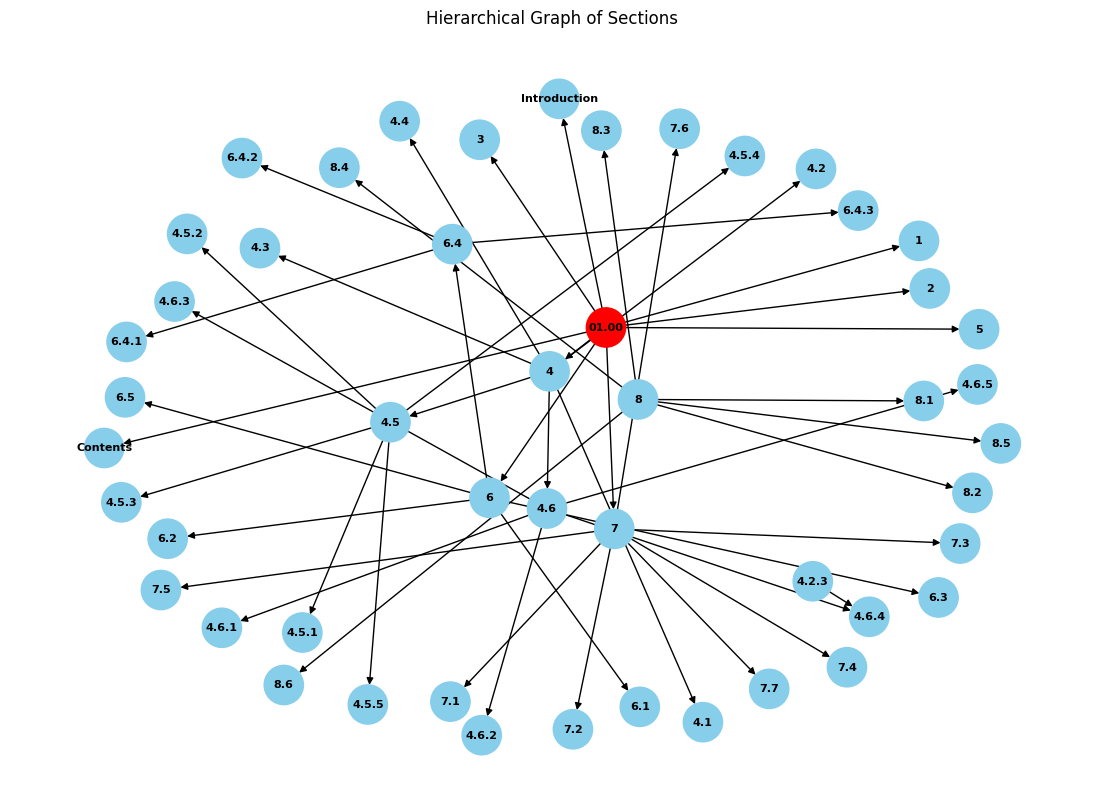

Processing text file: 0101-8k0_extracted.txt


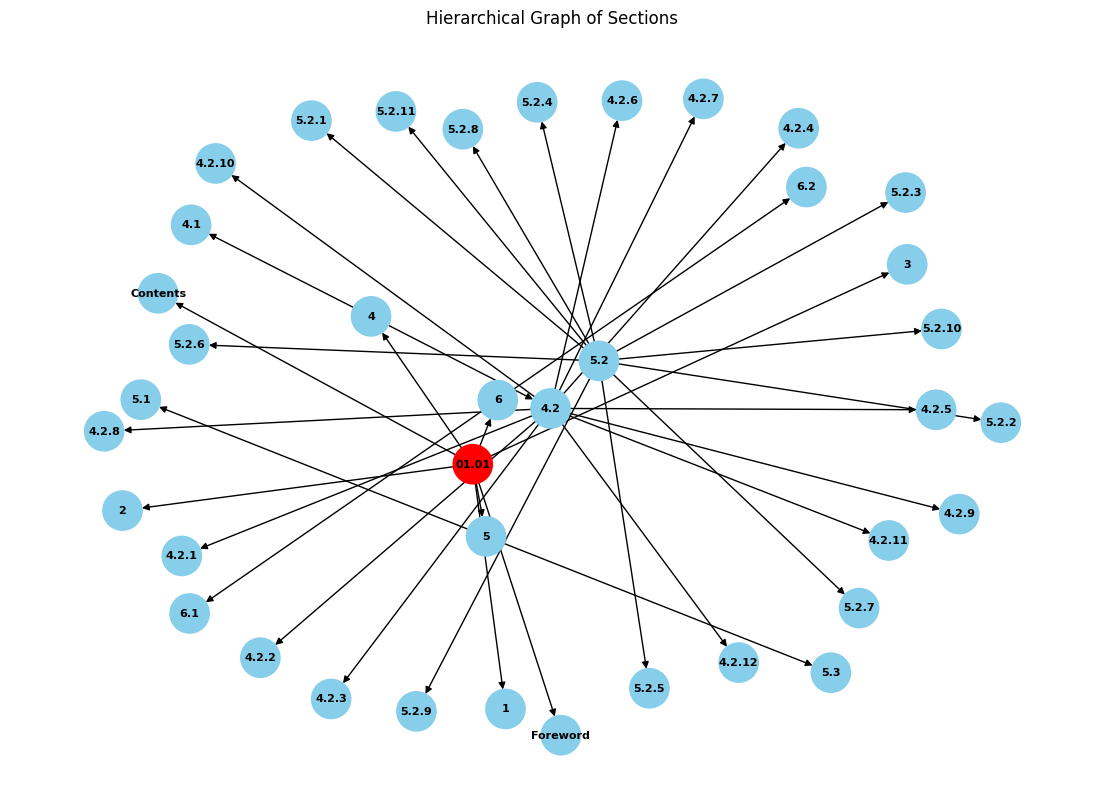

Processing text file: 0104-800_extracted.txt


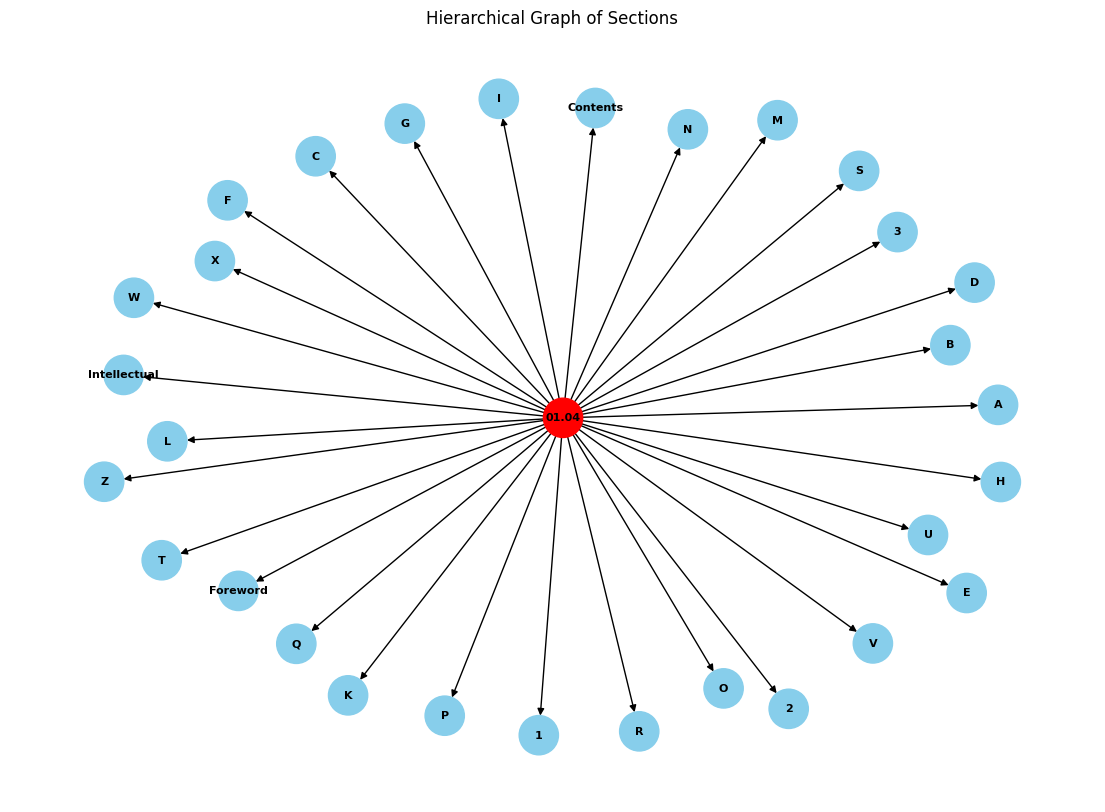

Processing text file: 0131-800_extracted.txt


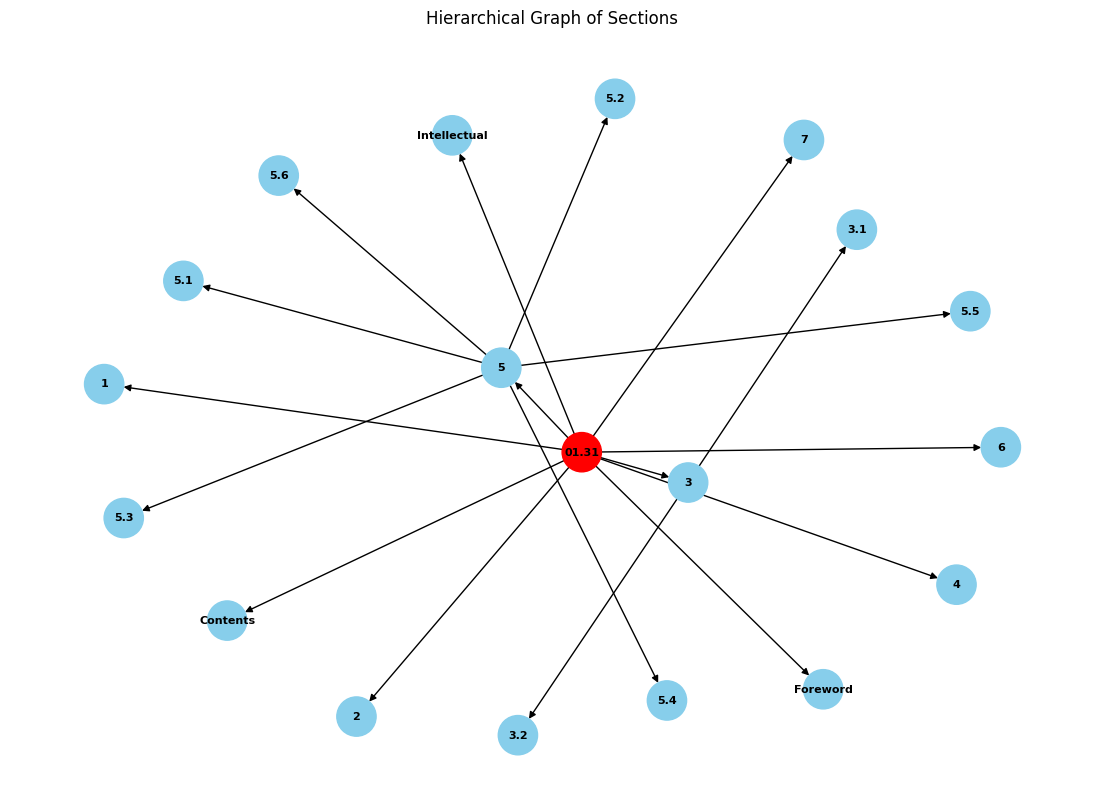

Processing text file: 0133-800_extracted.txt


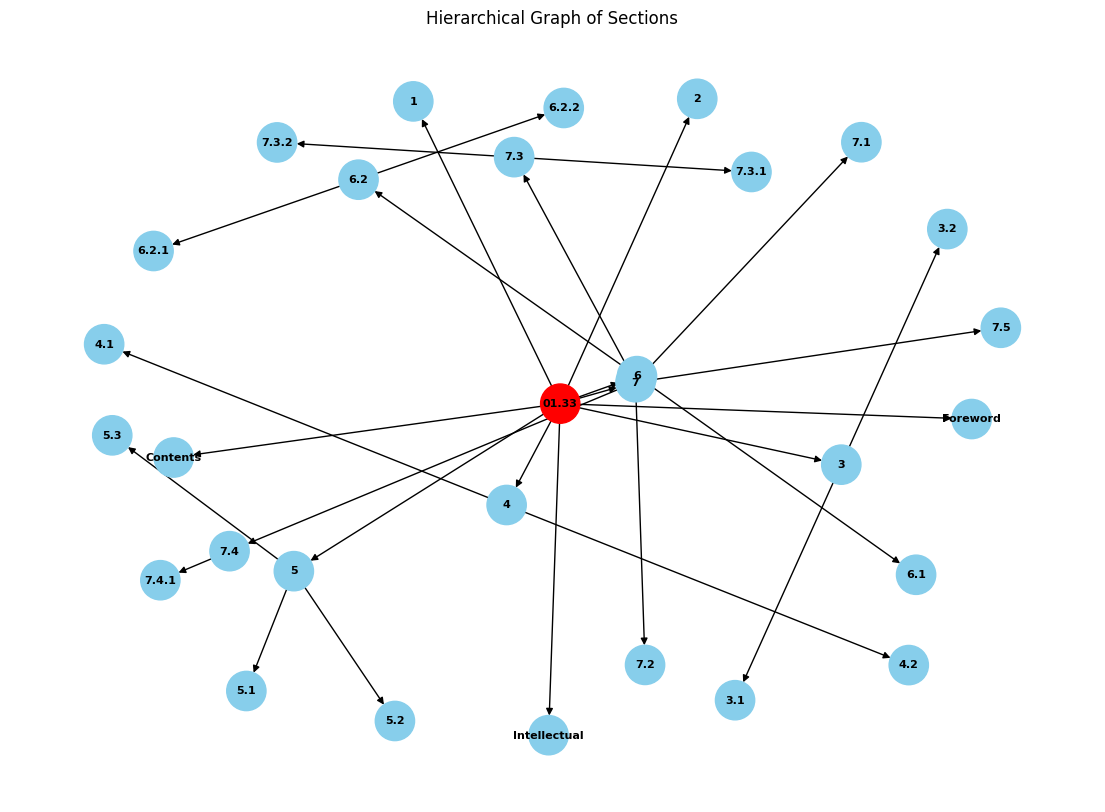

Processing text file: 0156-700_extracted.txt


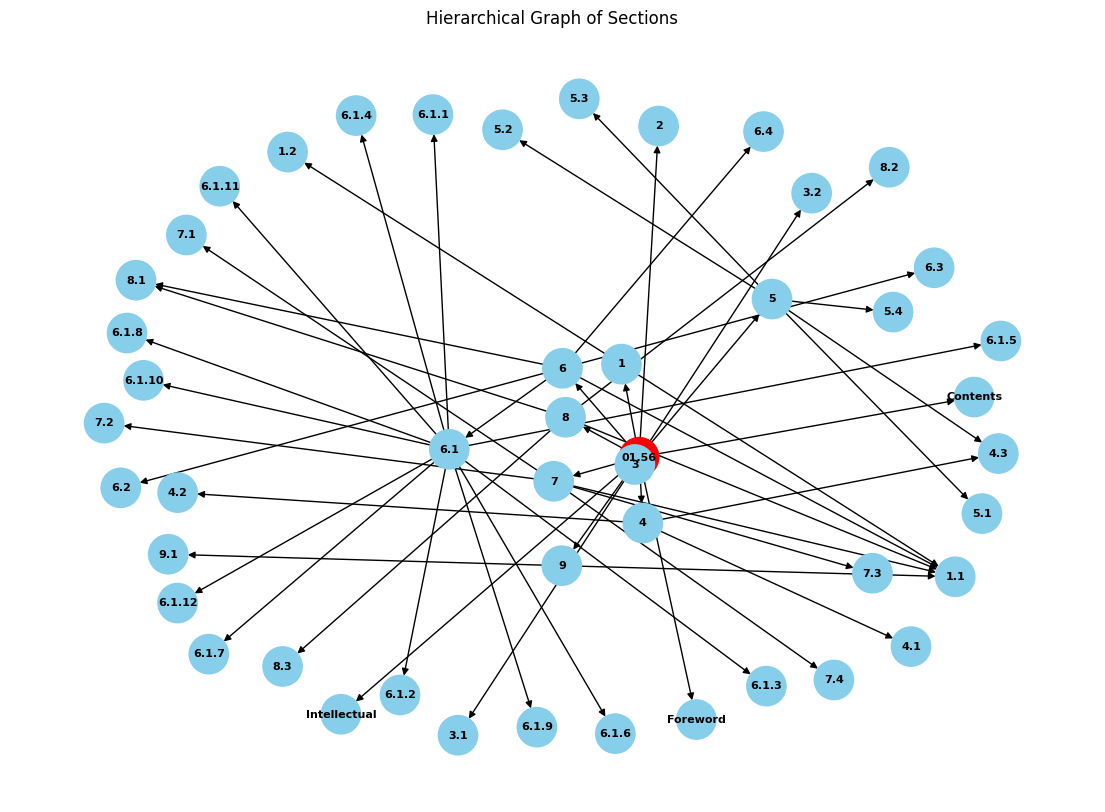

Processing text file: 0160_600_extracted.txt


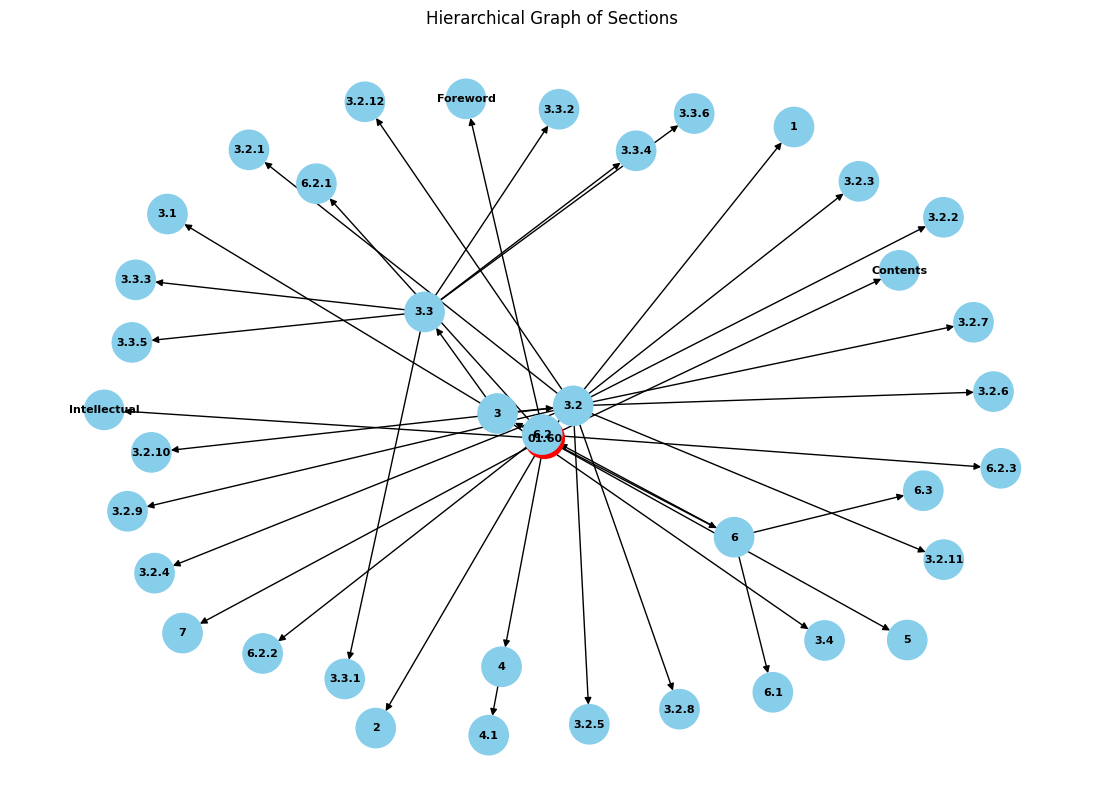

Processing text file: 0161-800_extracted.txt


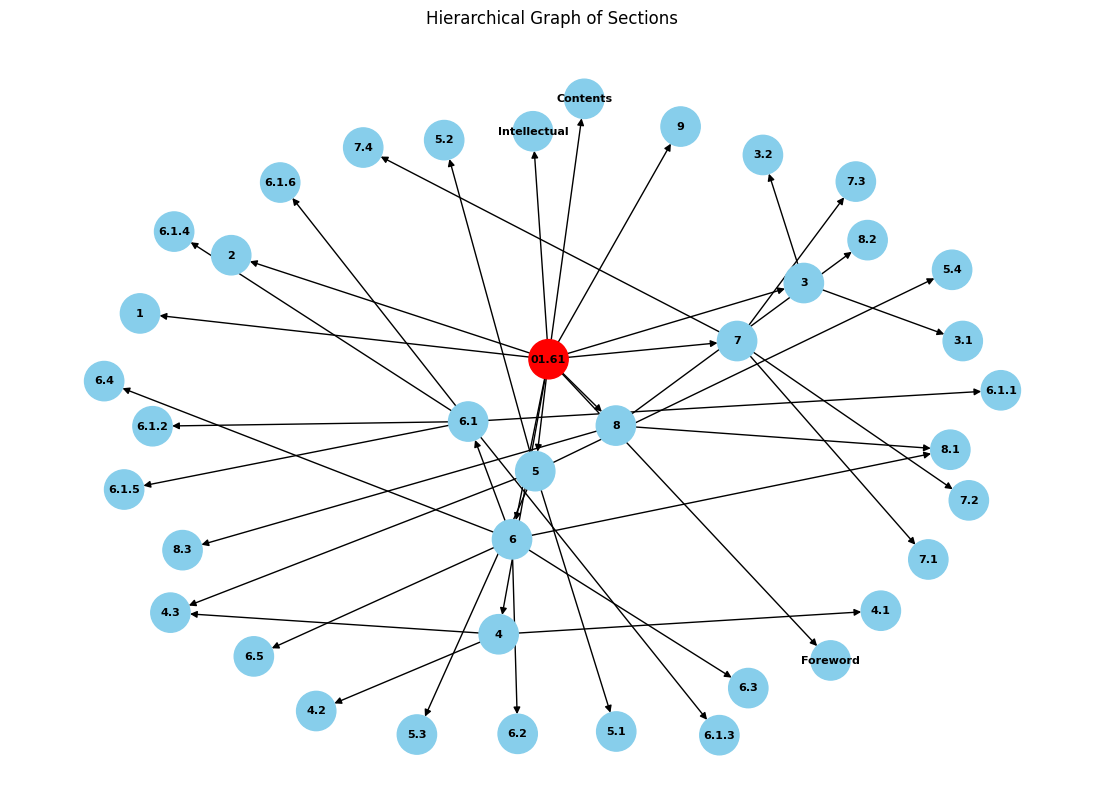

Total number of nodes: 296, Total number of edges: 294


In [9]:
import os
import json
import networkx as nx
import matplotlib.pyplot as plt

def process_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    G = nx.DiGraph()

    lines = text.strip().split('\n')
    depth_limit = 2

    # Extracting the file name without extension and stopping when encountering a symbol
    file_name = ''
    for i, c in enumerate(os.path.splitext(os.path.basename(file_path))[0]):
        if c.isalnum():
            file_name += c
            if i == 1:  # Add "." after the first two letters
                file_name += "."
        else:
            break
    
    G.add_node(file_name)
    for line in lines[1:]:
        parts = line.split()
        if len(parts) > 0:  # Check if parts is non-empty
            section = parts[0]
            if section.count('.') <= depth_limit:
                title = ' '.join(parts[1:])
                G.add_node(section, title=title)

                if '.' in section:
                    parent_section = '.'.join(section.split('.')[:-1])
                    G.add_edge(parent_section, section)
                else:
                    G.add_edge(file_name, section)

    return G

def update_graph_with_json(G, json_file_path):
    with open(json_file_path, 'r') as json_file:
        extra_edges = json.load(json_file)

    for source, targets in extra_edges.items():
        for target in targets:
            G.add_edge(source, target)

    return G

# Define folders containing '.txt' and '.json' files
txt_folder_path = r'D:\Work\IIT Bhilai\Internship\Specifications\series_01\ExtractedContent'
json_folder_path = r'D:\Work\IIT Bhilai\Internship\Specifications\series_01\diff_json'
output_folder = r'D:\Work\IIT Bhilai\Internship\Specifications\series_01\graph'

# Initialize variables to track total nodes and edges
total_nodes = 0
total_edges = 0

# Process each '.txt' file in the folder
for txt_filename in os.listdir(txt_folder_path):
    if txt_filename.endswith('.txt'):
        txt_file_path = os.path.join(txt_folder_path, txt_filename)
        print(f"Processing text file: {txt_filename}")
        graph = process_text_file(txt_file_path)
        
        # Define the JSON file path for the current text file
        json_filename = os.path.splitext(txt_filename)[0] + '.json'
        json_file_path = os.path.join(json_folder_path, json_filename)
        
        # Update the graph with JSON data
        graph = update_graph_with_json(graph, json_file_path)

        # Calculate number of nodes and edges for the current graph
        num_nodes = graph.number_of_nodes()
        num_edges = graph.number_of_edges()

        # Increment total nodes and edges counts
        total_nodes += num_nodes
        total_edges += num_edges

        # Visualization of the graph
        pos = nx.spring_layout(graph)
        fig, ax = plt.subplots(figsize=(14, 10))

        # Set root node color to red
        node_colors = ['red' if node == list(graph.nodes)[0] else 'skyblue' for node in graph.nodes]

        nx.draw(
            graph, pos, ax=ax, with_labels=True,
            node_size=800, node_color=node_colors, font_weight='bold', font_size=8
        )
        ax.set_title("Hierarchical Graph of Sections")

        # Save the graph as GML and PNG files
        output_graph_filename = os.path.splitext(txt_filename)[0]
        gml_output_path = os.path.join(output_folder, f'{output_graph_filename}.gml')
        png_output_path = os.path.join(output_folder, f'{output_graph_filename}.png')

        nx.write_gml(graph, gml_output_path)
        plt.savefig(png_output_path)
        plt.show()

# Display total number of nodes and edges across all graphs
print(f"Total number of nodes: {total_nodes}, Total number of edges: {total_edges}")


In [ ]:
print(f"Total number of nodes: {total_nodes}, Total number of edges: {total_edges}")

Total number of nodes: 296, Total number of edges: 294
